In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [3]:
my_df=pd.read_excel('F:\\my project\\dataset\\pop_area.xlsx',header=3)
my_df

,Country Name,Country Code,2021,2018,2021.1
0,Aruba,ABW,107195.0,1.800000e+02,0.401008
1,Africa Eastern and Southern,AFE,694665117.0,1.512116e+07,2.572461
2,Afghanistan,AFG,39835428.0,6.528600e+05,2.303412
3,Africa Western and Central,AFW,470898870.0,9.166270e+06,2.636291
4,Angola,AGO,33933611.0,1.246700e+06,3.195916
...,...,...,...,...,...
261,Kosovo,XKX,1806279.0,NaN,0.897901
262,"Yemen, Rep.",YEM,30490639.0,5.279700e+05,2.204030
263,South Africa,ZAF,60041996.0,1.219090e+06,1.228841
264,Zambia,ZMB,18920657.0,7.526100e+05,2.877596


In [4]:
my_df.rename(index=my_df['Country Name'],inplace=True)
my_df.drop(['Country Name','Country Code'],axis=1,inplace=True)
my_df

,2021,2018,2021.1
Aruba,107195.0,1.800000e+02,0.401008
Africa Eastern and Southern,694665117.0,1.512116e+07,2.572461
Afghanistan,39835428.0,6.528600e+05,2.303412
Africa Western and Central,470898870.0,9.166270e+06,2.636291
Angola,33933611.0,1.246700e+06,3.195916
...,...,...,...
Kosovo,1806279.0,NaN,0.897901
"Yemen, Rep.",30490639.0,5.279700e+05,2.204030
South Africa,60041996.0,1.219090e+06,1.228841
Zambia,18920657.0,7.526100e+05,2.877596


In [5]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2021    264 non-null    float64
 1   2018    264 non-null    float64
 2   2021.1  264 non-null    float64
dtypes: float64(3)
memory usage: 8.3+ KB


In [6]:
my_df.describe()

,2021,2018,2021.1
count,2.640000e+02,2.640000e+02,264.000000
mean,3.210893e+08,5.337684e+06,1.057591
std,9.988295e+08,1.550969e+07,1.142387
min,1.087300e+04,1.000000e+01,-4.170336
25%,1.791783e+06,2.090000e+04,0.304958
50%,1.054019e+07,2.037750e+05,0.968665
75%,6.295547e+07,1.251775e+06,1.853767
max,7.836631e+09,1.345427e+08,4.333410


In [7]:
my_df.rename(columns={'2018':'area','2021':'2021_pop','2021.1':'pop_growth'},inplace=True)
my_df

,2021_pop,area,pop_growth
Aruba,107195.0,1.800000e+02,0.401008
Africa Eastern and Southern,694665117.0,1.512116e+07,2.572461
Afghanistan,39835428.0,6.528600e+05,2.303412
Africa Western and Central,470898870.0,9.166270e+06,2.636291
Angola,33933611.0,1.246700e+06,3.195916
...,...,...,...
Kosovo,1806279.0,NaN,0.897901
"Yemen, Rep.",30490639.0,5.279700e+05,2.204030
South Africa,60041996.0,1.219090e+06,1.228841
Zambia,18920657.0,7.526100e+05,2.877596


In [8]:
max=my_df['2021_pop'].max()
max

7836630792.0

In [9]:
ind=my_df['2021_pop'][my_df['2021_pop']==max].index

In [10]:
my_df.drop(ind,axis=0,inplace=True)

In [11]:
my_df

,2021_pop,area,pop_growth
Aruba,107195.0,1.800000e+02,0.401008
Africa Eastern and Southern,694665117.0,1.512116e+07,2.572461
Afghanistan,39835428.0,6.528600e+05,2.303412
Africa Western and Central,470898870.0,9.166270e+06,2.636291
Angola,33933611.0,1.246700e+06,3.195916
...,...,...,...
Kosovo,1806279.0,NaN,0.897901
"Yemen, Rep.",30490639.0,5.279700e+05,2.204030
South Africa,60041996.0,1.219090e+06,1.228841
Zambia,18920657.0,7.526100e+05,2.877596


In [12]:
my_df.isnull()

,2021_pop,area,pop_growth
Aruba,False,False,False
Africa Eastern and Southern,False,False,False
Afghanistan,False,False,False
Africa Western and Central,False,False,False
Angola,False,False,False
...,...,...,...
Kosovo,False,True,False
"Yemen, Rep.",False,False,False
South Africa,False,False,False
Zambia,False,False,False


In [13]:
my_df.isnull().sum()

2021_pop      2
area          2
pop_growth    2
dtype: int64

In [14]:
my_df.dropna(axis=0,inplace=True)

In [15]:
my_df.isnull().sum()

2021_pop      0
area          0
pop_growth    0
dtype: int64

In [16]:
#my_df.fillna(0) = my_df.replace(np.NAN,0)

In [18]:
my_df2=pd.read_excel('F:\\my project\\dataset\\ex1.xlsx')
my_df2.drop('Unnamed: 0',axis=1,inplace=True)
my_df2

,A,B,C
0,a,A,a
1,a,A,a
2,a,A,B
3,a,B,B
4,b,B,b
5,b,B,b
6,b,B,A
7,b,A,A


In [19]:
my_df2.duplicated()

0    False
1     True
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [20]:
my_df2.drop_duplicates()

,A,B,C
0,a,A,a
2,a,A,B
3,a,B,B
4,b,B,b
6,b,B,A
7,b,A,A


In [21]:
my_df3=pd.concat([my_df,my_df2],axis=0)
my_df3

,2021_pop,area,pop_growth,A,B,C
Aruba,107195.0,1.800000e+02,0.401008,NaN,NaN,NaN
Africa Eastern and Southern,694665117.0,1.512116e+07,2.572461,NaN,NaN,NaN
Afghanistan,39835428.0,6.528600e+05,2.303412,NaN,NaN,NaN
Africa Western and Central,470898870.0,9.166270e+06,2.636291,NaN,NaN,NaN
Angola,33933611.0,1.246700e+06,3.195916,NaN,NaN,NaN
...,...,...,...,...,...,...
3,NaN,NaN,NaN,a,B,B
4,NaN,NaN,NaN,b,B,b
5,NaN,NaN,NaN,b,B,b
6,NaN,NaN,NaN,b,B,A


In [45]:
smartphone_df=pd.read_csv('F:\\my project\\dataset\\smartphone.csv')
smartphone_df

,name,os,capacity,ram,weight,company,inch
0,galaxy s8,android,64,4,149.0,samsung,5.8
1,lumia950,windows,32,3,150.0,microsoft,5.2
2,xperia l1,android,16,2,180.0,sony,5.5
3,iphone 7,ios,128,2,138.0,apple,4.7
4,u ultra,android,64,4,170.0,htc,5.7
5,galaxy s5,android,16,2,145.0,samsung,5.1
6,iphone 5s,ios,32,1,112.0,apple,4.0
7,moto g5,android,16,3,144.5,motorola,5.0
8,pixel,android,128,4,143.0,google,5.0


In [46]:
smartphone_df.describe()

,capacity,ram,weight,inch
count,9.000000,9.000000,9.000000,9.000000
mean,55.111111,2.777778,147.944444,5.111111
std,45.333333,1.092906,19.219854,0.548736
min,16.000000,1.000000,112.000000,4.000000
25%,16.000000,2.000000,143.000000,5.000000
50%,32.000000,3.000000,145.000000,5.100000
75%,64.000000,4.000000,150.000000,5.500000
max,128.000000,4.000000,180.000000,5.800000


In [47]:
smartphone_df['os'].value_counts()

android    6
ios        2
windows    1
Name: os, dtype: int64

In [48]:
smartphone_df.company.value_counts()

samsung      2
apple        2
microsoft    1
sony         1
htc          1
motorola     1
google       1
Name: company, dtype: int64

In [49]:
gr=smartphone_df.groupby(smartphone_df.os)

In [50]:
gr.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13572\57773461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr.mean()


,capacity,ram,weight,inch
os,,,,
android,50.666667,3.166667,155.25,5.35
ios,80.000000,1.500000,125.00,4.35
windows,32.000000,3.000000,150.00,5.20


In [51]:
pd.crosstab(smartphone_df.os,smartphone_df.ram)

ram,1,2,3,4
os,,,,
android,0,2,1,3
ios,1,1,0,0
windows,0,0,1,0


In [52]:
mask=smartphone_df.os=='android'
mask

0     True
1    False
2     True
3    False
4     True
5     True
6    False
7     True
8     True
Name: os, dtype: bool

In [53]:
mask=smartphone_df.os=='android'
smartphone_df.ram[mask]

0    4
2    2
4    4
5    2
7    3
8    4
Name: ram, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2511a242dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2511a243310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2511a242b30>],
 'medians': [<matplotlib.lines.Line2D at 0x2511a243850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2511a243af0>],
 'means': []}

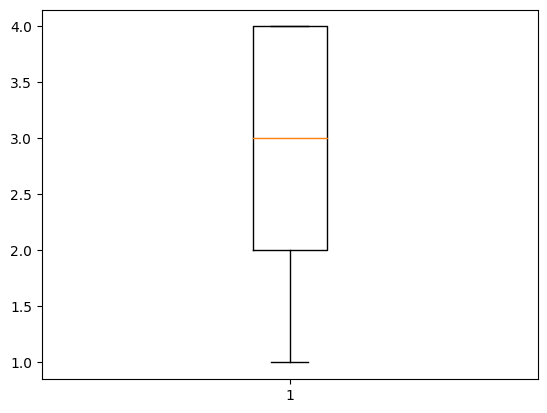

In [54]:
plt.boxplot(smartphone_df.ram)

{'whiskers': [<matplotlib.lines.Line2D at 0x2511a29a6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2511a29abf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2511a29a410>],
 'medians': [<matplotlib.lines.Line2D at 0x2511a29b130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2511a29b3d0>],
 'means': []}

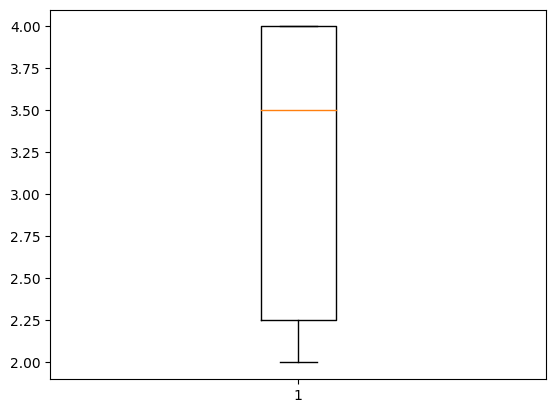

In [55]:
plt.boxplot(smartphone_df.ram[mask])

In [56]:
pd.crosstab(smartphone_df.os,smartphone_df.inch)

inch,4.0,4.7,5.0,5.1,5.2,5.5,5.7,5.8
os,,,,,,,,
android,0,0,2,1,0,1,1,1
ios,1,1,0,0,0,0,0,0
windows,0,0,0,0,1,0,0,0


In [57]:
pd.crosstab(smartphone_df.company,smartphone_df.capacity)

capacity,16,32,64,128
company,,,,
apple,0,1,0,1
google,0,0,0,1
htc,0,0,1,0
microsoft,0,1,0,0
motorola,1,0,0,0
samsung,1,0,1,0
sony,1,0,0,0


In [58]:
pd.pivot_table(smartphone_df,index='name',columns='company',values='ram')

company,apple,google,htc,microsoft,motorola,samsung,sony
name,,,,,,,
galaxy s5,NaN,NaN,NaN,NaN,NaN,2.0,NaN
galaxy s8,NaN,NaN,NaN,NaN,NaN,4.0,NaN
iphone 5s,1.0,NaN,NaN,NaN,NaN,NaN,NaN
iphone 7,2.0,NaN,NaN,NaN,NaN,NaN,NaN
lumia950,NaN,NaN,NaN,3.0,NaN,NaN,NaN
moto g5,NaN,NaN,NaN,NaN,3.0,NaN,NaN
pixel,NaN,4.0,NaN,NaN,NaN,NaN,NaN
u ultra,NaN,NaN,4.0,NaN,NaN,NaN,NaN
xperia l1,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [59]:
pd.pivot_table(smartphone_df,index='name',columns='ram',values='capacity')

ram,1,2,3,4
name,,,,
galaxy s5,NaN,16.0,NaN,NaN
galaxy s8,NaN,NaN,NaN,64.0
iphone 5s,32.0,NaN,NaN,NaN
iphone 7,NaN,128.0,NaN,NaN
lumia950,NaN,NaN,32.0,NaN
moto g5,NaN,NaN,16.0,NaN
pixel,NaN,NaN,NaN,128.0
u ultra,NaN,NaN,NaN,64.0
xperia l1,NaN,16.0,NaN,NaN


In [60]:
smartphone_df.index=smartphone_df.name
smartphone_df.drop(['name','company'],axis=1,inplace=True)
smartphone_df

,os,capacity,ram,weight,inch
name,,,,,
galaxy s8,android,64,4,149.0,5.8
lumia950,windows,32,3,150.0,5.2
xperia l1,android,16,2,180.0,5.5
iphone 7,ios,128,2,138.0,4.7
u ultra,android,64,4,170.0,5.7
galaxy s5,android,16,2,145.0,5.1
iphone 5s,ios,32,1,112.0,4.0
moto g5,android,16,3,144.5,5.0
pixel,android,128,4,143.0,5.0


In [61]:
smartphone_df.index

Index(['galaxy s8', 'lumia950', 'xperia l1', 'iphone 7', 'u ultra',
       'galaxy s5', 'iphone 5s', 'moto g5', 'pixel'],
      dtype='object', name='name')

In [63]:
smartphone_df2=pd.get_dummies(smartphone_df)
smartphone_df2

,capacity,ram,weight,inch,os_android,os_ios,os_windows
name,,,,,,,
galaxy s8,64,4,149.0,5.8,1,0,0
lumia950,32,3,150.0,5.2,0,0,1
xperia l1,16,2,180.0,5.5,1,0,0
iphone 7,128,2,138.0,4.7,0,1,0
u ultra,64,4,170.0,5.7,1,0,0
galaxy s5,16,2,145.0,5.1,1,0,0
iphone 5s,32,1,112.0,4.0,0,1,0
moto g5,16,3,144.5,5.0,1,0,0
pixel,128,4,143.0,5.0,1,0,0


In [64]:
smartphone_df2.describe()

,capacity,ram,weight,inch,os_android,os_ios,os_windows
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,55.111111,2.777778,147.944444,5.111111,0.666667,0.222222,0.111111
std,45.333333,1.092906,19.219854,0.548736,0.500000,0.440959,0.333333
min,16.000000,1.000000,112.000000,4.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,143.000000,5.000000,0.000000,0.000000,0.000000
50%,32.000000,3.000000,145.000000,5.100000,1.000000,0.000000,0.000000
75%,64.000000,4.000000,150.000000,5.500000,1.000000,0.000000,0.000000
max,128.000000,4.000000,180.000000,5.800000,1.000000,1.000000,1.000000


In [65]:
from sklearn.preprocessing import scale

In [66]:
scale_data=scale(smartphone_df2)
scale_data

array([[ 0.20797258,  1.18616051,  0.05825152,  1.33156402,  0.70710678,
        -0.53452248, -0.35355339],
       [-0.54072872,  0.21566555,  0.11343717,  0.17181471, -1.41421356,
        -0.53452248,  2.82842712],
       [-0.91507936, -0.75482941,  1.76900675,  0.75168936,  0.70710678,
        -0.53452248, -0.35355339],
       [ 1.70537518, -0.75482941, -0.54879066, -0.79464304, -1.41421356,
         1.87082869, -0.35355339],
       [ 0.20797258,  1.18616051,  1.21715023,  1.13827247,  0.70710678,
        -0.53452248, -0.35355339],
       [-0.91507936, -0.75482941, -0.16249109, -0.02147684,  0.70710678,
        -0.53452248, -0.35355339],
       [-0.54072872, -1.72532437, -1.98361762, -2.1476839 , -1.41421356,
         1.87082869, -0.35355339],
       [-0.91507936,  0.21566555, -0.19008391, -0.21476839,  0.70710678,
        -0.53452248, -0.35355339],
       [ 1.70537518,  1.18616051, -0.27286239, -0.21476839,  0.70710678,
        -0.53452248, -0.35355339]])

In [67]:
scale_data_df=pd.DataFrame(scale_data,index=smartphone_df2.index,columns=smartphone_df2.columns)
scale_data_df

,capacity,ram,weight,inch,os_android,os_ios,os_windows
name,,,,,,,
galaxy s8,0.207973,1.186161,0.058252,1.331564,0.707107,-0.534522,-0.353553
lumia950,-0.540729,0.215666,0.113437,0.171815,-1.414214,-0.534522,2.828427
xperia l1,-0.915079,-0.754829,1.769007,0.751689,0.707107,-0.534522,-0.353553
iphone 7,1.705375,-0.754829,-0.548791,-0.794643,-1.414214,1.870829,-0.353553
u ultra,0.207973,1.186161,1.217150,1.138272,0.707107,-0.534522,-0.353553
galaxy s5,-0.915079,-0.754829,-0.162491,-0.021477,0.707107,-0.534522,-0.353553
iphone 5s,-0.540729,-1.725324,-1.983618,-2.147684,-1.414214,1.870829,-0.353553
moto g5,-0.915079,0.215666,-0.190084,-0.214768,0.707107,-0.534522,-0.353553
pixel,1.705375,1.186161,-0.272862,-0.214768,0.707107,-0.534522,-0.353553


In [68]:
import seaborn as sb

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13572\1652890670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(scale_data_df.capacity)


<AxesSubplot: xlabel='capacity', ylabel='Density'>

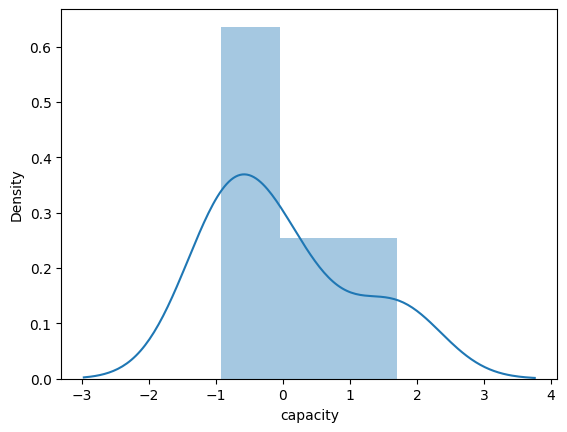

In [69]:
sb.distplot(scale_data_df.capacity)

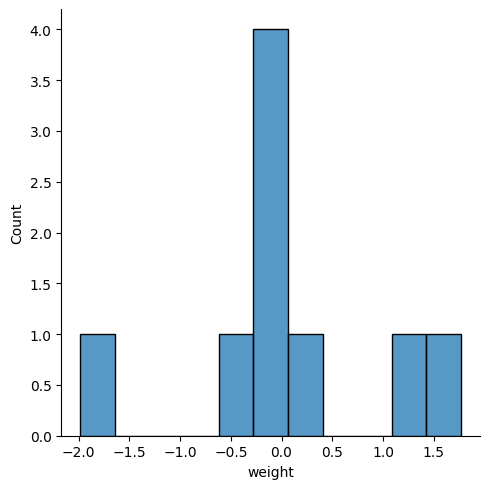

In [71]:
sb.displot(scale_data_df.weight)

In [72]:
from sklearn.preprocessing import normalize

In [74]:
norm_data=normalize(smartphone_df2,norm='l2',axis=0)
norm_data_df=pd.DataFrame(norm_data,index=smartphone_df2.index,columns=smartphone_df2.columns)
norm_data_df

,capacity,ram,weight,inch,os_android,os_ios,os_windows
name,,,,,,,
galaxy s8,0.305888,0.450035,0.333221,0.376338,0.408248,0.000000,0.0
lumia950,0.152944,0.337526,0.335458,0.337406,0.000000,0.000000,1.0
xperia l1,0.076472,0.225018,0.402549,0.356872,0.408248,0.000000,0.0
iphone 7,0.611775,0.225018,0.308621,0.304963,0.000000,0.707107,0.0
u ultra,0.305888,0.450035,0.380185,0.369849,0.408248,0.000000,0.0
galaxy s5,0.076472,0.225018,0.324276,0.330918,0.408248,0.000000,0.0
iphone 5s,0.152944,0.112509,0.250475,0.259543,0.000000,0.707107,0.0
moto g5,0.076472,0.337526,0.323158,0.324429,0.408248,0.000000,0.0
pixel,0.611775,0.450035,0.319803,0.324429,0.408248,0.000000,0.0


In [75]:
norm_data2=normalize(smartphone_df2,norm='l1',axis=0)
norm_data_df2=pd.DataFrame(norm_data2,index=smartphone_df2.index,columns=smartphone_df2.columns)
norm_data_df2

,capacity,ram,weight,inch,os_android,os_ios,os_windows
name,,,,,,,
galaxy s8,0.129032,0.16,0.111904,0.126087,0.166667,0.0,0.0
lumia950,0.064516,0.12,0.112655,0.113043,0.000000,0.0,1.0
xperia l1,0.032258,0.08,0.135186,0.119565,0.166667,0.0,0.0
iphone 7,0.258065,0.08,0.103643,0.102174,0.000000,0.5,0.0
u ultra,0.129032,0.16,0.127676,0.123913,0.166667,0.0,0.0
galaxy s5,0.032258,0.08,0.108900,0.110870,0.166667,0.0,0.0
iphone 5s,0.064516,0.04,0.084116,0.086957,0.000000,0.5,0.0
moto g5,0.032258,0.12,0.108524,0.108696,0.166667,0.0,0.0
pixel,0.258065,0.16,0.107398,0.108696,0.166667,0.0,0.0


In [76]:
from sklearn.preprocessing import minmax_scale

In [77]:
minmax_data=minmax_scale(smartphone_df2,(0,1),axis=0)
minmax_data_df=pd.DataFrame(minmax_data,index=smartphone_df2.index,columns=smartphone_df2.columns)
minmax_data_df

,capacity,ram,weight,inch,os_android,os_ios,os_windows
name,,,,,,,
galaxy s8,0.428571,1.000000,0.544118,1.000000,1.0,0.0,0.0
lumia950,0.142857,0.666667,0.558824,0.666667,0.0,0.0,1.0
xperia l1,0.000000,0.333333,1.000000,0.833333,1.0,0.0,0.0
iphone 7,1.000000,0.333333,0.382353,0.388889,0.0,1.0,0.0
u ultra,0.428571,1.000000,0.852941,0.944444,1.0,0.0,0.0
galaxy s5,0.000000,0.333333,0.485294,0.611111,1.0,0.0,0.0
iphone 5s,0.142857,0.000000,0.000000,0.000000,0.0,1.0,0.0
moto g5,0.000000,0.666667,0.477941,0.555556,1.0,0.0,0.0
pixel,1.000000,1.000000,0.455882,0.555556,1.0,0.0,0.0


In [78]:
df=pd.Series(np.array([1,2,3,4,10,27]))

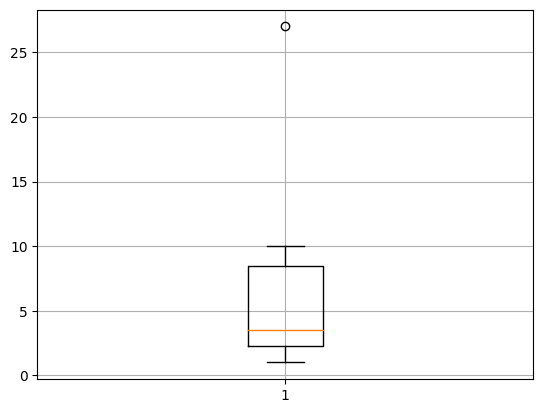

In [81]:
plt.boxplot(df)
plt.grid()

In [80]:
df.quantile([0.25,0.5,0.75])

0.25    2.25
0.50    3.50
0.75    8.50
dtype: float64